In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import pandas as pd
import numpy as np

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [69]:
def prepare_data():
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
    for c in categorical_columns:
        df[c] = df[c].str.lower().str.replace(' ', '_')

In [70]:
prepare_data()

In [71]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [72]:
# coerce will make non numberic values as null, and filla will replace it by 0
# though 0 is not always good, becuase on practie it can mean people did nto spend anything and it is not true, 
# so repalceing by 0 is not always a good idea
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)

In [73]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

In [74]:
df.churn = (df.churn == 'yes').astype(int)

In [75]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [76]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [77]:
df.churn.value_counts(normalize=True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

^ 26.5 is churn rate

In [78]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [79]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [80]:
numerical = ['tenure','monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [81]:
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [82]:
global_curn = df.churn.mean()
female_curn = df[df.gender == 'female'].churn.mean()
with_partner_curn = df[df.partner == 'yes'].churn.mean()

In [83]:
with_partner_curn / global_curn # Risk ratio: < 1 lower probability

0.7410375164075894

In [84]:
female_curn / global_curn # Risk ratio: ~ 1 same probability

1.014466016021912

In [85]:
from IPython.display import display
for category in categorical:
    df_group = df.groupby(category).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_curn
    df_group['risk'] = df_group['mean'] / global_curn
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.269209,3488,0.003839,1.014466
male,0.261603,3555,-0.003766,0.985807


,mean,count,diff,risk
seniorcitizen,,,,
0,0.236062,5901,-0.029308,0.889557
1,0.416813,1142,0.151443,1.570686


,mean,count,diff,risk
partner,,,,
no,0.329580,3641,0.064210,1.241964
yes,0.196649,3402,-0.068721,0.741038


,mean,count,diff,risk
dependents,,,,
no,0.312791,4933,0.047422,1.178700
yes,0.154502,2110,-0.110868,0.582215


,mean,count,diff,risk
phoneservice,,,,
no,0.249267,682,-0.016103,0.939319
yes,0.267096,6361,0.001726,1.006506


,mean,count,diff,risk
multiplelines,,,,
no,0.250442,3390,-0.014927,0.943749
no_phone_service,0.249267,682,-0.016103,0.939319
yes,0.286099,2971,0.020729,1.078114


,mean,count,diff,risk
internetservice,,,,
dsl,0.189591,2421,-0.075779,0.714441
fiber_optic,0.418928,3096,0.153558,1.578656
no,0.074050,1526,-0.191320,0.279044


,mean,count,diff,risk
onlinesecurity,,,,
no,0.417667,3498,0.152297,1.573906
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.146112,2019,-0.119258,0.550597


,mean,count,diff,risk
onlinebackup,,,,
no,0.399288,3088,0.133918,1.504645
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.215315,2429,-0.050055,0.811377


,mean,count,diff,risk
deviceprotection,,,,
no,0.391276,3095,0.125906,1.474456
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.225021,2422,-0.040349,0.847951


,mean,count,diff,risk
techsupport,,,,
no,0.416355,3473,0.150985,1.568960
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.151663,2044,-0.113706,0.571517


,mean,count,diff,risk
streamingtv,,,,
no,0.335231,2810,0.069861,1.263261
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.300702,2707,0.035332,1.133143


,mean,count,diff,risk
streamingmovies,,,,
no,0.336804,2785,0.071434,1.269188
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.299414,2732,0.034044,1.128291


,mean,count,diff,risk
contract,,,,
month-to-month,0.427097,3875,0.161727,1.609440
one_year,0.112695,1473,-0.152675,0.424672
two_year,0.028319,1695,-0.237051,0.106714


,mean,count,diff,risk
paperlessbilling,,,,
no,0.163301,2872,-0.102069,0.615371
yes,0.335651,4171,0.070281,1.264842


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.167098,1544,-0.098271,0.629681
credit_card_(automatic),0.152431,1522,-0.112939,0.574410
electronic_check,0.452854,2365,0.187484,1.706502
mailed_check,0.191067,1612,-0.074303,0.720003


Mutual information: concept that tells us how much we can learn about one variable if we know the value of other
https://en.wikipedia.org/wiki/Mutual_information

In [86]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df.churn, df.contract)

0.09845305342598942

In [87]:
from IPython.display import display
from sklearn.metrics import mutual_info_score

In [88]:
def mutual_info(series):
    return  mutual_info_score(df.churn, series)

In [89]:
# relative importance
mi = df[categorical].apply(mutual_info)
mi.sort_values(ascending=False)

contract            0.098453
onlinesecurity      0.064677
techsupport         0.063021
internetservice     0.055574
onlinebackup        0.046792
paymentmethod       0.044519
deviceprotection    0.043917
streamingmovies     0.032001
streamingtv         0.031908
paperlessbilling    0.019194
dependents          0.014467
partner             0.011454
seniorcitizen       0.010577
multiplelines       0.000801
phoneservice        0.000072
gender              0.000037
dtype: float64

Contract variable is most important and gender least important

For numerical colums we should use Correlation coefitient

In [90]:
df[numerical].corrwith(df.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.198324
dtype: float64

tenure - amount of months within company. longer -> lower churn
higher monthly churges -> higher churn

One-hot encoding

In [91]:
from sklearn import preprocessing
import pandas as pd

def normalize(frame):
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled = min_max_scaler.fit_transform(frame)

    return pd.DataFrame(scaled, columns = frame.columns)

def oneHodeEncode(frame, categories):
    return pd.get_dummies(frame, columns=categories, dtype=int)


In [92]:
most_important_categories = [ 'seniorcitizen', 'partner', 'dependents','internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

features = ['tenure','monthlycharges', 'totalcharges', 'seniorcitizen', 'partner', 'dependents','internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [93]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.25, random_state=1)#oneHodeEncode(X_train, categorical)

y_train = train.churn.values
y_val = val.churn.values
y_test = test.churn.values

del train['churn']
del val['churn']
del test['churn']

train = oneHodeEncode(train[features], most_important_categories)
val = oneHodeEncode(val[features], most_important_categories)
test = oneHodeEncode(test[features], most_important_categories)

train = normalize(train)
val = normalize(val)
test = normalize(test)

X_train = train.reset_index(drop=True)
X_val = val.reset_index(drop=True)
X_test= test.reset_index(drop=True)

display(X_train)
display(X_val)
display(X_test)

,tenure,monthlycharges,totalcharges,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,internetservice_dsl,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,1.000000,0.971528,0.970103,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.138889,0.769231,0.117625,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.069444,0.572428,0.047629,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.069444,0.625375,0.041003,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.250000,0.018482,0.042661,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0.722222,0.625375,0.469734,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4221,0.250000,0.068931,0.054901,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4222,0.027778,0.716783,0.021883,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4223,0.375000,0.062438,0.087734,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


,tenure,monthlycharges,totalcharges,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,internetservice_dsl,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,0.986111,0.521522,0.573627,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.013889,0.020020,0.002393,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.013889,0.016016,0.002347,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.027778,0.570070,0.021822,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.013889,0.011512,0.002295,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.555556,0.321321,0.234893,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1405,0.791667,0.514014,0.451356,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1406,0.250000,0.364865,0.122040,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1407,0.013889,0.746246,0.010761,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,tenure,monthlycharges,totalcharges,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,internetservice_dsl,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,0.569444,0.611194,0.382908,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.916667,0.836582,0.746254,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.166667,0.262869,0.060462,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.069444,0.318841,0.028821,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.138889,0.471764,0.076109,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.347222,0.872064,0.306171,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1405,0.208333,0.008996,0.038236,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1406,0.986111,0.352324,0.448391,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1407,0.902778,0.670165,0.655922,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def plot_result(y_pred, y):
    print(f'accuracy:'{y_pred == y).mean()}')
    print(f'# of predicted 1:{np.sum([1 for x in y_pred if x == 1])}')
    print(f'# of actual 1:{np.sum(y == 1)}')

    sns.histplot(y_pred, color='red', alpha=0.5, bins=20)
    pl = sns.histplot(y, color='blue', alpha=0.5, bins=20)

0.8069552874378992
318
348


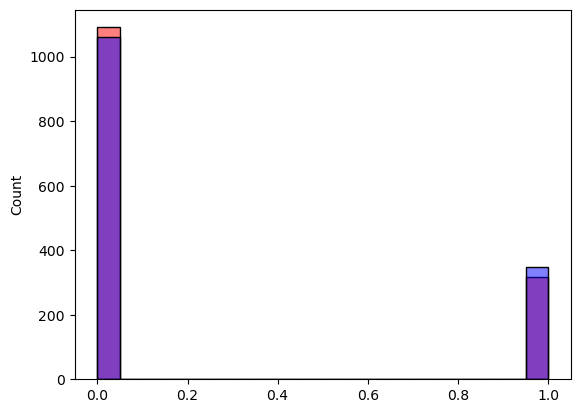

In [108]:
import sys
sys.path.append('./models')
from LogisticRegression import LogisticRegression

my_model = LogisticRegression(lr=0.0001, iterations=5000)
my_model.fit(X_train, y_train)

predicted = my_model.predict(X_test)
plot_result(predicted, y_test)

df_pred = pd.DataFrame()
df_pred['probability'] = my_model.predict_probability(X_test)
df_pred['predicted'] = predicted
df_pred['actual'] = y_test



0.808374733853797
318
348


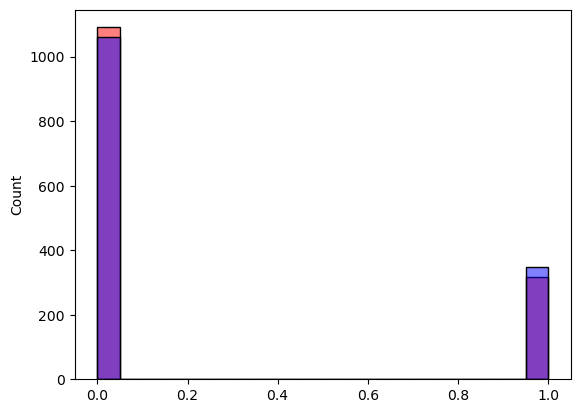

In [104]:
from sklearn.linear_model import LogisticRegression

sk_model = LogisticRegression()
sk_model.fit(X_train, y_train)

sk_pred = sk_model.predict(X_test)
plot_result(sk_pred, y_test)